### 爬取搜狗首页的数据
- 指定url
- 对url发出http请求，get or post
- 获取响应数据
- 持久化存储

In [2]:
import requests

In [17]:
# 指定url
url = 'https://www.sogou.com/web?query=%E5%B9%B4%E5%90%8E'
# 发起请求 返回一个相应对象
response = requests.get(url, headers=headers)# 参数：url, params, headers
# 获取相应数据 
page_text = response.text

fileName = 'hi.html'
with open(fileName, 'w', encoding='utf-8') as fp:
    fp.write(page_text)

#### 网页采集器


In [1]:
# UA伪装 User-Agent
# 服务网站的服务器会检测对应请求的载体身份标识
# 如果检测为某一款浏览器，那就说明是正常的请求
# 如果监测到载体身份标识不是浏览器的，说明就是不正常的请求，也就是爬虫

# 封装头
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36'
}

url = 'https://www.sogou.com/web'
kw = 'hi'
# 处理url携带的参数：封装到字典中
param = {
    'query':kw
}
# 对指定的url发起的请求是携带参数的
response = requests.get(url, params=param, headers=headers)

page_text = response.text
print(page_text)

NameError: name 'requests' is not defined

#### 百度翻译
- 使用google的network抓包工具，可以看到HXR的响应
- 发送了Post请求
- 相应数据是一组json文件

In [18]:
# 1.UA伪装
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36'
}

# 2. 指定URL
post_url = 'https://fanyi.baidu.com/sug'

# 与3. Post请求参数（与get一致）
data = {
    'kw':'dog'
}

# 4. 请求发送
response = request.post(post_url, data, headers = headers)# url, data(params参数)

# 5. 获取响应数据 返回字典对象，只有相应数据是json类型的时候才用这个方法
print(response.json())
import json

# 持久化存储
# file = open(,encoding='utf-8')
# json.dump(response.json(), fp=文件对象, ensure_ascii=False)

{'errno': 0, 'data': [{'k': 'dog', 'v': 'n. 狗; 犬; 公狗; 公狐; 公狼; 赛狗; 灵𤟥赛; v. (长期)困扰，折磨，纠缠; 跟踪;'}, {'k': 'dogs', 'v': 'n. 狗; 犬; 公狗; 公狐; 公狼; 赛狗; 灵𤟥赛; v. (长期)困扰，折磨，纠缠; 跟踪;'}, {'k': 'doge', 'v': 'n. （美西部）孤犊，无母犊牛;'}, {'k': 'doggy', 'v': 'n. (儿语)小狗，汪汪，狗狗; adj. 狗的; 像狗一样的;'}, {'k': 'doggie', 'v': 'n. (儿语)狗狗;'}]}


#### 豆瓣电影

In [22]:
# 1.UA伪装
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36'
}

# 2. 指定URL
url = 'https://movie.douban.com/j/chart/top_list?type=24&interval_id=100%3A90&action=&start=20&limit=20'

# 3. 请求参数
params = {
    'type': '24',
'interval_id': '100:90',
'action': '',
'start': '20', # 从库中的第几个电影开始
'limit': '20'  # 取出多少个
}

# 4. 请求响应
response = requests.get(url=url, params=params, headers=headers)

# 看看返回乐啥)
print(response.json())

[{'rating': ['9.2', '45'], 'rank': 21, 'cover_url': 'https://img2.doubanio.com/view/photo/s_ratio_poster/public/p1959764913.jpg', 'is_playable': True, 'id': '1299628', 'types': ['喜剧', '爱情'], 'regions': ['美国'], 'title': '马戏团', 'url': 'https://movie.douban.com/subject/1299628/', 'release_date': '1928-01-06', 'actor_count': 19, 'vote_count': 13137, 'score': '9.2', 'actors': ['阿尔·欧内斯特·加西亚', '梅尔纳·肯尼迪', '哈里·克罗克', 'George Davis', '亨利·伯格曼', '蒂尼·桑福德', '约翰兰德', '查理·卓别林', '艾伯特·奥斯汀', '斯坦利·布莱斯通', '海尼·康克林', 'Toraichi Kono', '贝蒂莫里西', "L.J. O'Connor", '杰克 P. 皮尔斯', 'Hugh Saxon', 'Armand Triller', '吉恩·巴瑞', '乔治·W·戴维斯'], 'is_watched': False}, {'rating': ['9.2', '50'], 'rank': 22, 'cover_url': 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2409467410.jpg', 'is_playable': False, 'id': '26946612', 'types': ['剧情', '喜剧', '爱情'], 'regions': ['中国大陆'], 'title': '狐妖小红娘剧场版：王权富贵', 'url': 'https://movie.douban.com/subject/26946612/', 'release_date': '2016-05-20', 'actor_count': 7, 'vote_count': 7713, 'sco

#### 药监总局
点进去查看详细信息

In [23]:
url = 'http://scxk.nmpa.gov.cn:81/xk/'
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36'
}

# 发送请求和响应请求合成一步
page_text = requests.get(url=url, headers=headers).text

with open('药监总局.html', 'w', encoding='utf-8') as fp:
    fp.write(page_text)

这样子会发现相比原来地址，用爬虫的话是没有新的信息的，这是为啥呢

**一定说明这些数据不是那个url请求得到的**

很有可能是Ajax，在这个例子里就是Ajax

**这种方法叫做动态加载数据**

In [28]:
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36'
}
url = 'http://scxk.nmpa.gov.cn:81/xk/itownet/portalAction.do?method=getXkzsList'
data = {
    'on': 'true',
'page': '1', # 第一页的数据
'pageSize': '15', # 每页显示信息数量
'productName': '',
'conditionType': '1',
'applyname': '',
}

response = requests.post(url=url, data=data, headers=headers) 

# print(response.json())

我们想要获取到每个详情页的url，但是上面的josn里面并没有url，但是有***id***

对url分析，域名都是一样的，只有携带的参数“id”不一样

#### 数据解析
1. 进行标签的定位
2. 将标签中的数据进行提取

##### bs4
1. 实例化Beautiful对象，将源码加载到对象中
2. 使用该对象相关的属性或者方法进行标签定位or数据解析

环境安装
pip install bs4
pip install lxml

In [33]:
# 实例化bs4
from bs4 import BeautifulSoup


In [75]:
# 1. 将本地html的数据加载到对象中
fp = open('alice.html', 'r', encoding='utf-8')
soup = BeautifulSoup(fp,'lxml')# 文件对象 解析器
print(soup.prettify())

<html>
 <body>
  <p>
   html_doc = """
  </p>
  <title>
   The Dormouse's story
  </title>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
  """
 </body>
</html>


In [78]:
soup.select('body > a')

[]

In [ ]:
# 2. 将网上的加载到对象中
page_text = response.text
soup = BeautifulSoup(page_text, 'lxml')

tag标签就是\< div\>, \< head\>, \< p\>这些

使用方法;`soup.tagName` ，返回的是出现的第一个标签

In [36]:
soup.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

与之类似的方法是soup.find(TagName)，也是只返回第一个

soup.find_all(TagName)可以找到符合要求的所有的

##### Select函数
```python
# 类选择器：.+类名：class=tang -> .tang
# 标签选择器：不加任何修饰
# id选择器：#+id
soup.select('某种选择器')
# 还能够选择位置
soup.select('.tang > ul > li[1]')
```

1 通过标签名称查找

In [38]:
soup.select('title') 

[<title>The Dormouse's story</title>]

2 通过类名查找

In [39]:
soup.select('.sister')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

3 通过 id 名查找

In [41]:
soup.select('#link1')


[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>]

4 组合查找

组合查找即和写 class 文件时，标签名与类名、id名进行的组合原理是一样的，例如查找 p 标签中，id 等于 link1的内容，二者需要用空格分开

In [43]:
soup.select('p #link1')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>]

直接子标签查找 这里`>`表示一个层级，空格表示多个层级

In [55]:
soup.select("body > p")

[<p>html_doc = """
 </p>,
 <p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

5 属性查找

查找时还可以加入属性元素，属性需要用中括号括起来，注意属性和标签属于同一节点，所以中间不能加空格，否则会无法匹配到。

In [51]:
soup.select('a[href="http://example.com/lacie"]')

[<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>]

同样，属性仍然可以与上述查找方式组合，不在同一节点的空格隔开，同一节点的不加空格

In [52]:
soup.select('body a[href="http://example.com/lacie"]')

[<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>]

#### 获取标签之间的文本数据or属性值
定位到标签后，直接.text/.string/.get_text()
- text/get_text()可以获得一个标签中所有的内容，包括直系的+子节点的
- string 只获得直系的文本内容
- 属性值，直接['TagName']

### 爬取三国演义小说所有章节标题和章节内容
www.shicimingju.com/book/sanguoyanyi.html

In [60]:
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36'
}
url = 'https://www.shicimingju.com/book/sanguoyanyi.html'

page_text = requests.get(url=url, headers=headers).text

In [62]:
soup = BeautifulSoup(page_text,'lxml')

In [79]:
soup.select('body div .book-mulu a')[0]['href']

IndexError: list index out of range

In [91]:
soup.select('body')[0].text

'html_doc = """\nThe Dormouse\'s story\nThe Dormouse\'s story\nOnce upon a time there were three little sisters; and their names were\nElsie,\nLacie and\nTillie;\nand they lived at the bottom of a well.\n...\n"""'

In [92]:
soup.select('body')[0].string

In [ ]:
if response.status_code == 200:
    return response.content

def pare_content(content):
    print()

#### 异步爬虫的方式
- 多线程，多进程（不建议使用）
    - 好处：阻塞操作不会相互等待
    - 坏处：无法无限制地开启多线程或者多进程，因为CPU的资源是有限的
- 线程池、进程池适当使用（）
    - 好处：可以降低系统对进程或者线程创建和销毁的一个频率，从而降低系统的开销
    - 弊端：池中线程或进程的数量是有上限的

In [1]:
import time
# 使用单线程串行方法执行

def get_page(str):
    print('正在下载', str)
    time.sleep(2)
    print('下载结束', str)

    # 四个url
name_list = ['xiaozi', 'aa', 'bb', 'cc']

start_time = time.time()

for i in range(len(name_list)):
    get_page(name_list[i])

end_time = time.time()
print('%d second'%(end_time-start_time))

正在下载 xiaozi
下载结束 xiaozi
正在下载 aa
下载结束 aa
正在下载 bb
下载结束 bb
正在下载 cc
下载结束 cc
8 second


In [5]:
import time
from multiprocessing.dummy import Pool
# 使用线程池方法执行

start_time = time.time()

def get_page(str):
    print('正在下载', str)
    time.sleep(2)
    print('下载结束', str)

    # 四个url
name_list = ['xiaozi', 'aa', 'bb', 'cc']

# 实例化线程池对象
pool = Pool(4)

# 参数：会阻塞的函数，迭代对象
# 将列表的每一个元素传递给get_page进行传递
pool.map(get_page,name_list) # func, iter


end_time = time.time()
print('%d second'%(end_time-start_time))

正在下载正在下载正在下载正在下载 aa
 cc
 bb
 xiaozi
下载结束 下载结束aa
 cc
下载结束 bb
下载结束 xiaozi
2 second


### 爬取梨视频数据

In [8]:
import requests
from bs4 import BeautifulSoup
from lxml import etree
# 封装头
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36'
}

In [10]:
# 对下面的url发起请求，解析出视频详情页的url和食品名称
url = 'https://www.pearvideo.com/category_5'
page_text = requests.get(url=url, headers=headers).text

tree = etree.HTML(page_text)
tree.xpath()


TypeError: xpath() takes exactly 1 positional argument (0 given)

#### 单线程+异步携程（推荐使用）
- event_loop 事件循环，相当于一个无限循环，我们可以把一些函数注册到这个事件循环上，当满足某些条件的时候，函数就会被循环执行
- coroutine 携程对象，我们可以将携程对象注册到事件循环中他会被事件循环调用，我们可以使用async关键字来定义一个方法，这个方法在调用的时候不会立即被执行，而是返回一个协程对象
- task 任务，他是对携程对象的进一步封装，包含了任务的各个形态
- future：代表将来执行或还没有执行的任务，实际上和task没有本质区别
- async 定义一个协程
- await 用挂起来阻塞的方法运行

In [12]:
 import asyncio 

In [15]:
import asyncio 
import requests

async def request(url):
    print('正在请求的url是',url)
    print('请求成功', url)
    return url

# async修饰的函数    ，调用之后返回一个携程对象
c = request('www.baidu.com')

'''
# 创建一个事件循环对象
loop = asyncio.get_event_loop()

# 将协程对象注册到loop中，然后启动loop
loop.run_until_complete(c)
'''

'''
# task的使用 封装协程对象
loop = asyncio.get_event_loop()

# 基于loop创建了一个task对象
task = loop.create_task(c)
print(task)
loop.run_until_complete(task)

# 这是执行之后的
print(task)
'''

'''
# future的使用 跟上面的task的结果是一样的
loop = asyncio.get_event_loop()

task = asyncio.ensure_future(c)
print(task)
loop.run_until_complete(task)
print(task)
'''

'''
# task.result()可以返回协程对象的函数返回值
def callback_func(task):
    print(task.result())

# 绑定回调
loop = asyncio.get_event_loop()
task = asyncio.ensure_future(c)

# 将回调函数绑定到任务对象中
task.add_done_callback(callback_func)

# 执行完原本的协程对象后，就会调用回调函数
loop.run_until_complete(task)
'''


<Task pending coro=<request() running at <ipython-input-15-a326fef68e23>:1>>


RuntimeError: This event loop is already running

正在请求的url是 www.baidu.com
请求成功 www.baidu.com


### 多任务协程

In [16]:
import asyncio
import time

async def request(url):
    print('正在下载',url)
    # 在异步协程中，如果出现了同步模块相关的代码，就没法实现异步
    # time.sleep(2)
    
    # 当在asyncio中遇到阻塞操作的时候必须手动挂起
    await asyncio.sleep(2)
    
    print('卸载完毕',url)

    
start = time.time()
urls = [
    'www.baidu.com',
    'www.sougou.com',
    'www.doubanjia.com'
]
# 任务列表 需要存放多个任务对象
stasks = []
for url in urls:
    c = request(url)
    task = asyncio.ensure_future(c)
    stasks.append(task)
    
loop = asyncio.get_event_loop()
# 将stasks（任务列表）封装到wait方法中
loop.run_until_complete(asyncio.wait(stasks))

print(time.time()-start)

RuntimeError: This event loop is already running

正在下载 www.baidu.com
卸载完毕 www.baidu.com
正在下载 www.sougou.com
卸载完毕 www.sougou.com
正在下载 www.doubanjia.com
卸载完毕 www.doubanjia.com


由于requests是同步爬虫，因此没法实现异步操作，因此需要换一个别的
而aiohttp是异步网络请求的模块，用它就可以了

`pip install aiohttp`

使用该模块的ClientSession类型对象发送网络请求就行

In [7]:
import aiohttp
import asyncio
import time

async def request(url):
    # 这里的session和之前cookie的session一样
    # 所有的with都要有async修饰
    async with aiohttp.CilentSession() as session:
        #get(),post()方法都有
        # headers, get还是params, post还是data，跟requests一抹一眼
        # proxy设置代理='http://ip:port'
        # 手动挂起相应对象，因此用await
        async with await session.get(url) as response:
            # text() 返回字符串形式的响应数据
            # json() 返回json对象
            # read() 返回二进制的相应数据
            
            # 在获取相应数据操作之前一定要使用await进行手动挂起
            page_text = await response.text()
            print(page_text)

    
start = time.time()
urls = [
    'www.baidu.com',
    'www.sougou.com'
]
# 任务列表 需要存放多个任务对象
stasks = []
for url in urls:
    c = request(url)
    task = asyncio.ensure_future(c)
    stasks.append(task)
    
loop = asyncio.get_event_loop()
# 将stasks（任务列表）封装到wait方法中
loop.run_until_complete(asyncio.wait(stasks))

print(time.time()-start)

RuntimeError: This event loop is already running

In [ ]:

start = time.time()
urls = [
    'https://bbs.baobeihuijia.com/forum-189-2.html',
    'https://bbs.baobeihuijia.com/forum-189-12.html',
    'https://bbs.baobeihuijia.com/forum-189-122.html'
]
# 任务列表 需要存放多个任务对象
stasks = []
for url in urls:
    c = request(url)
    task = asyncio.ensure_future(c)
    stasks.append(task)
    
loop = asyncio.get_event_loop()
# 将stasks（任务列表）封装到wait方法中
loop.run_until_complete(asyncio.wait(stasks))

print(time.time()-start)


In [6]:
from bs4 import BeautifulSoup
import requests
import time

# User-Agent 保护
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36'
}

def request(url):
    print('查找',url)
    page_text = requests.get(url,headers=headers).text
    print(len(page_text))

start = time.time()
urls = [
    'https://www.baidu.com',
    'https://www.sougou.com'
]

for i in range(1,10):
    urls.append('https://bbs.baobeihuijia.com/forum-189-{0}.html'.format(i))

print('长度',len(urls))
# 任务列表 需要存放多个任务对象
stasks = []
for url in urls:
    c = request(url)
    

print(time.time()-start)

11
查找 https://www.baidu.com
284837
查找 https://www.sougou.com
15549
查找 https://bbs.baobeihuijia.com/forum-189-1.html
75181
查找 https://bbs.baobeihuijia.com/forum-189-2.html
68835
查找 https://bbs.baobeihuijia.com/forum-189-3.html
68627
查找 https://bbs.baobeihuijia.com/forum-189-4.html
68816
查找 https://bbs.baobeihuijia.com/forum-189-5.html
68931
查找 https://bbs.baobeihuijia.com/forum-189-6.html
68859
查找 https://bbs.baobeihuijia.com/forum-189-7.html
68295
查找 https://bbs.baobeihuijia.com/forum-189-8.html
67660
查找 https://bbs.baobeihuijia.com/forum-189-9.html
67686
2.4401023387908936


In [52]:

ip = "123.163.121.137:9021"
proxy = {
    'http': 'http://' + ip,
    'https': 'https://' + ip
}
print(proxy)


import requests
from lxml import etree
url = "http://ip.293.net/"

headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36'}

page_text = requests.get(url=url,headers=headers,proxies=proxy, timeout = 500 )
                                                          
tree = etree.HTML(page_text.text)
tree.xpath('/html/body/div[2]/div//text()')

{'http': 'http://123.163.121.137:9021', 'https': 'https://123.163.121.137:9021'}


ProxyError: HTTPConnectionPool(host='123.163.121.137', port=9021): Max retries exceeded with url: http://ip.293.net/ (Caused by ProxyError('Cannot connect to proxy.', NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000236774056D8>: Failed to establish a new connection: [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。',)))

In [46]:
tree.xpath('/html/body/div[2]/div//text()')

['\n\t\t\t\t\t\t\n                  ',
 '您的IP地址是：',
 '59.71.241.23',
 ' ',
 '复制该IP',
 '来自：',
 '湖北省武汉市中国地质大学',
 '操作系统：',
 'Windows NT',
 ' ',
 '浏览器：',
 'Chrome 85.0.4183.102',
 'GeoIP定位：',
 'China Wuhan',
 ' 纬度：',
 '30.5833',
 ' 经度：',
 '114.2667',
 '\n\t\t\t\t  \t\t\t\t  ']

In [17]:
tree

'\n'

In [23]:
page_text.text.encode('iso-8859-1').decode('utf-8')

UnicodeEncodeError: 'latin-1' codec can't encode characters in position 724-727: ordinal not in range(256)

'<!DOCTYPE html>\n<!--STATUS OK-->\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\t\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\t\n\n\n\n\n<html>\n\t<head>\n\t\t\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\t<meta http-equiv="content-type" content="text/html;charset=utf-8">\n\t\t<meta content="always" name="referrer">\n        <meta name="theme-color" content="#2932e1">\n        <link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />\n        <link rel="icon" sizes="any" mask href="//www.baidu.com/img/baidu_85beaf5496f291521eb75ba38eacbd87.svg">\n        <link rel="search" type="application/opensearchdescription+xml" href="/content-search.xml" title="百度搜索" />\n\t\t\n\t\t\n<title>ip_百度搜索</title>\n\n\t\t\n\n\t\t\n<style data-for="result" type="text/css" id=
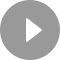
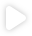

In [24]:
page_text.text